# Dev.to Stats Analysis

## Import Required Modules / Libraries

In [1]:
import sqlite3

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from modules.seaborn_templates import sns_defaults, sns_hbarplot_ax

## Set Defaults For Seaborn

In [2]:
sns_defaults

## Connect To SQLite3 Database

In [3]:
con=sqlite3.connect('/Volumes/data/pi4-server-backup/python-project-dev-to-stats/project/db.sqlite3')

## Import SQL Queries

In [4]:
from modules.sql_queries import (
    sql_max_article_comments, sql_max_article_likes, 
    sql_all_article_views, sql_max_article_views
    )

## Collect Required Data From The Database

In [5]:
articles_all_rows = pd.read_sql_query(sql_all_article_views, con)

In [6]:
article_comments = pd.read_sql_query(sql_max_article_comments, con)
article_comments_top_10 = article_comments.sort_values(by="count", ascending=False).head(10)

In [7]:
article_likes = pd.read_sql_query(sql_max_article_likes, con)
article_likes_top_10 = article_likes.sort_values(by="count", ascending=False).head(10)

In [8]:
article_views = pd.read_sql_query(sql_max_article_views, con)
article_views_top_10 = article_views.sort_values(by="count", ascending=False).head(10)

## Visualise The Data

### Top 10 Most Viewed Articles

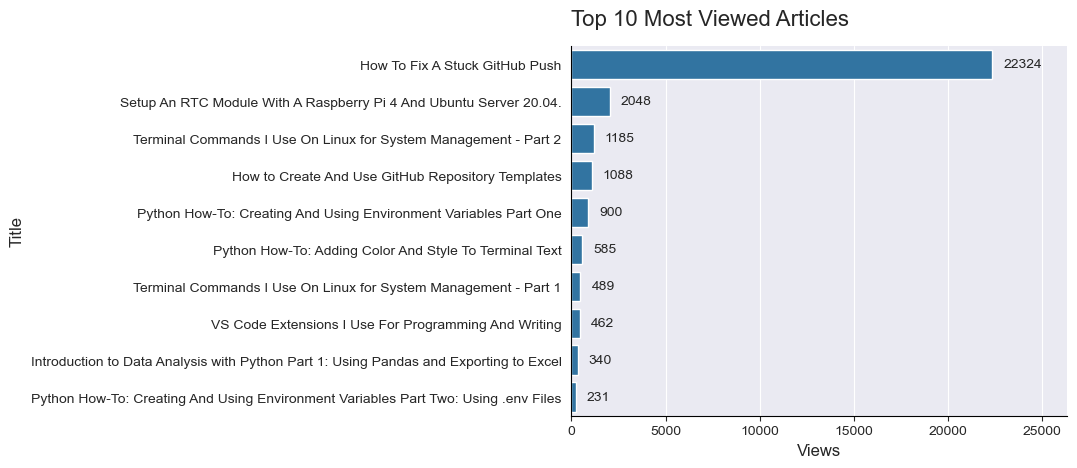

In [9]:
sns_hbarplot_ax(data = article_views_top_10.sort_values(ascending=False, by="count").tail(10),
                y_axis = "title",
                y_axis_label = "Title",
                x_axis = "count",
                x_axis_label = "Views",
                x_axis_max_value = article_views_top_10["count"].max(),
                x_axis_max_value_extra = 4000,
                title = "Top 10 Most Viewed Articles");

### Top 10 Most Liked Articles

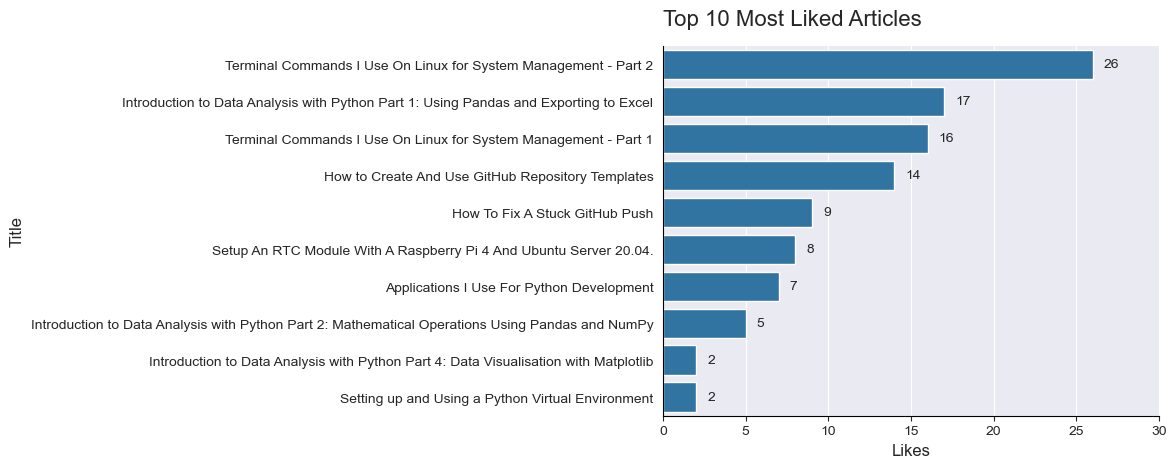

In [10]:
sns_hbarplot_ax(data = article_likes_top_10.sort_values(ascending=False, by="count").tail(10),
                y_axis = "title",
                y_axis_label = "Title",
                x_axis = "count",
                x_axis_label = "Likes",
                x_axis_max_value = article_likes_top_10["count"].max(),
                x_axis_max_value_extra = 0,
                title = "Top 10 Most Liked Articles");

### Top 10 Most Commented Articles

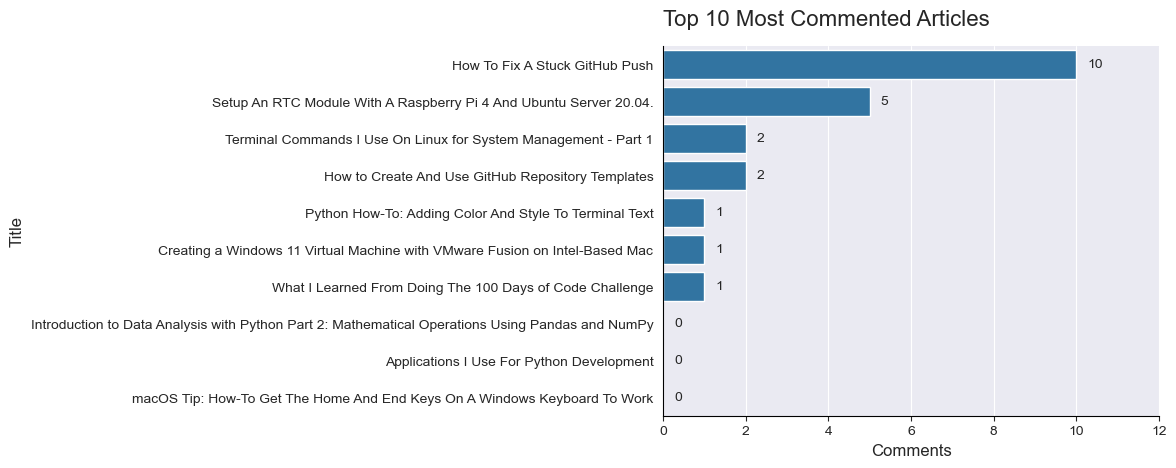

In [11]:
sns_hbarplot_ax(data = article_comments_top_10.sort_values(ascending=False, by="count").tail(10),
                y_axis = "title",
                y_axis_label = "Title",
                x_axis = "count",
                x_axis_label = "Comments",
                x_axis_max_value = article_comments_top_10["count"].max(),
                x_axis_max_value_extra = 2,
                title = "Top 10 Most Commented Articles");

### Article Views History